<a href="https://colab.research.google.com/github/Nikhil-Mathur13/Pan-Card-Tampering/blob/main/Data_Science_and_ML_Projetcs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PAN Card Tampering Detection**

The Purpose of this project is to detect tampering PAN Card using Computer Vision . This Project will help different organization in detecting whether the ID i.e. the PAN card provided to their employees or customers or anyone is original or not.


Fot this project we will calculate structural similarity of original PAN card and the PAN Card uploaded by user.


In [ ]:
# import the necessary Packages
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [ ]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [ ]:
# Open image and display
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg' , stream = True).raw)
tampered = Image.open(requests.get('https://adarshc.com/data/user/index/ent/document/pan/banner.jpg' , stream = True).raw)

Loading Original and user provided images.

In [ ]:
# The file format of the source file.
print("Original imge Format :" , original.format)
print("Tampered imge Format :" , tampered.format)


# Image size, in pixels , The size is given as a 2-tuple (width , height).
print("Original image Size : " , original.size)
print("Tampered image Size : ", tampered.size)

Original imge Format : JPEG
Tampered imge Format : JPEG
Original image Size :  (1200, 800)
Tampered image Size :  (709, 444)


Converting the Format of tampered image similar to original image.

In [ ]:
# Resize The Image
original = original.resize((250 , 160))
print(original.size)
original.save('/content/pan_card_tampering/image/origial.png') # Save image

tampered = tampered.resize((250,160))
tampered.save('/content/pan_card_tampering/image/tampered.png') # Save image

(250, 160)


Here, We checked the format and size of the original and tampered image.

In [ ]:
# Change the type if required
tampered = Image.open('/content/pan_card_tampering/image/tampered.png')
tampered.save('/content/pan_card_tampering/image/tampered.png') # can do png to jpg

Converting the size of Tampered and Original Image

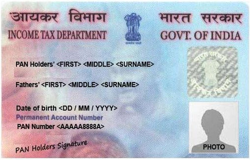

In [ ]:
# Display original image
original

  Original PAN Card image used for comparision

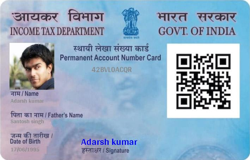

In [ ]:
# Display user given image
tampered

User provided image which will be compared with PAN Crad

In [ ]:
# Load the two input images

original = cv2.imread('/content/pan_card_tampering/image/origial.png')
tampered = cv2.imread('/content/pan_card_tampering/image/tampered.png')

Reading images using opencv

In [ ]:
# convert the images to grayscale

original_gray = cv2.cvtColor(original , cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered , cv2.COLOR_BGR2GRAY)


Converting the Images into graysvale using OpenCV , Because in image processing many applications doesn't help us in identifying the important , edges of the coloured images also bit complex to understand by machine because they have 3 channel while grayscale has only 1 channel.


In [ ]:
#Compute the structural_similarity Index (SSIM) between the two images , ensuring that the difference image is returned

(score, diff) = structural_similarity(original_gray,tampered_gray , full = True)
diff = (diff * 255).astype("uint8")
print("SSIM : {}".format(score))

SSIM : 0.242071740938189


Structural similarity index helps us to determine exactly where in terms of x,y coordinates location , the image difference are. Here , we are trying to find the similarities  between the original and tampered image , The Lower the SSIM score lower is the similarity.

In [ ]:
 # Calculating the threshold and countours
thresh  = cv2.threshold(diff , 0 , 255 , cv2.THRESH_BINARY_INV  | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy() , cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

Here , we are using threshold function of computer vision which applies an adaptive threshold to the image which is stored in the form array. This function transforms the grayscale image into a binary image using a mathematical formula.

Find contours works on binary image and retrive the contours.This contours are a useful tool for shape analysis and recognition . Grab contours grabs the appropriate value of the contours.

In [ ]:
# Loop over the contours
for c in cnts:
  #applying contours on image
  (x,y,w,h) = cv2.boundingRect(c)
  cv2.rectangle(original,(x,y),(x+w , y+h) , (0 , 0 , 255) , 2)
  cv2.rectangle(tampered,(x,y) ,(x+w , y+h) , (0,0,255) , 2)


Bounding Rectangle helps in findingthe ratio of width to height of bounding rectangle of the object . we compute the bounding box of the contour and then draw the bounding box on both input images to represent where the two images are different or not.

Original Format Image


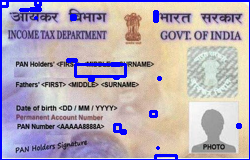

In [ ]:
#Display original image with contour
print("Original Format Image")
Image.fromarray(original)

Tampered Format Image


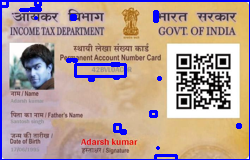

In [ ]:
#Display tampered image with contour
print("Tampered Format Image")
Image.fromarray(tampered)

Difference Image


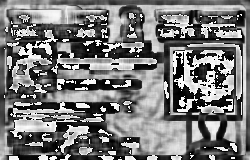

In [ ]:
# Display difference  image with black
print("Difference Image")
Image.fromarray(diff)

Threshhold Image


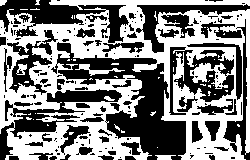

In [ ]:
# Display the Threshold image with white
print("Threshhold Image")
Image.fromarray(thresh)


Summary

Finding out structural similarity of the images helped us in finding the difference or similarity in the shape of the images.
Similariy , finding out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition .

As, our SSIM ~ 18.2% we can say that the image user provided is fake or tampered.

Finally we visualized the difference and similarities between the images using by displaying the images with contours , difference and threshold.


Scope -

This Project can be used in different organization where customers or users need to provide any kind of ID in order to get themselves verified. The organozation can use this project to find out whether the ID is original or Fake. Similarly this can be used for any type of ID like adhar , voter id , etc.


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **Dog Breed  Prediction**

In this Project , we will see how to use Keras and Tensorflow to build train , and test a Convolutional Neural Network (CNN) capable of identifying the breed of a dog in a supplied image . This is a Supervised learning problem , specifically a multiclass classification problem.



In [ ]:
# Run this cell and select the kaggale.json file download
#from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"nik1303","key":"1e0ec9d5bdf889b7ef7e6d482dd626c6"}'}

We will start by connecting to Kaggle using Kaggle API which can be downloaded from your Kaggle account's settings and uploading it here(Upload Box).

In [ ]:
# Next , install the Kaggle API client
!pip install -q kaggle

Next we will install Kaggle API using pip installation.

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle , so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


# This permissions change avoids a warning on kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json
!ls -l ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
ls: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Setting up Kaggle using Kaggle API

In [ ]:
#Creating directory and changing the current working directory
!mkdir dog_dataset
%cd dog_dataset

/content/dog_dataset


To store the data we will create a new directory  and make it as current working directory.

In [ ]:
# Serching for dataset
!kaggle datasets list -s dogbreedidfromcomp

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


Searching kaggle for the required dataset using search options with the 'dogbreedidfromcomp'. We can also use different search options like searching competitions , notebook , kernels , datasets etc.

In [ ]:
#Downloading dataset and coming out of directory
!kaggle datasets download catherinehorng/dogbreedidfromcomp
%cd..

Dataset URL: https://www.kaggle.com/datasets/catherinehorng/dogbreedidfromcomp
License(s): unknown
dogbreedidfromcomp.zip: Skipping, found more recently modified local copy (use --force to force download)


UsageError: Line magic function `%cd..` not found.


After searching the data next step would be downloading the data intp collab notebook using refernces found in search options.

In [ ]:
# Unzipping downloaded file and removing unusable file
!unzip dog_dataset/dogbreedidfromcomp.zip  -d dog_dataset
!rm dog_dataset/dogbreedidfromcomp.zip
!rm dog_dataset/sample_submission.csv

unzip:  cannot find or open dog_dataset/dogbreedidfromcomp.zip, dog_dataset/dogbreedidfromcomp.zip.zip or dog_dataset/dogbreedidfromcomp.zip.ZIP.
rm: cannot remove 'dog_dataset/dogbreedidfromcomp.zip': No such file or directory
rm: cannot remove 'dog_dataset/sample_submission.csv': No such file or directory


We will unzip the data which is downloaded and remove the irrelevent files.

In [ ]:
#Important Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection  import train_test_split
from keras.models import Sequential
from keras.layers import Dense , Dropout , Flatten , Conv2D , MaxPool2D
from keras.optimizers import Adam

In [ ]:
#Read The Labels.csv file and checking shape and records
labels_all = pd.read_csv("/content/Dogs_breed.csv")
print(labels_all.shape)
labels_all.head()

(9346, 3)


,filepaths,labels,data set
0,train/Afghan/001.jpg,Afghan,train
1,train/Afghan/002.jpg,Afghan,train
2,train/Afghan/003.jpg,Afghan,train
3,train/Afghan/004.jpg,Afghan,train
4,train/Afghan/005.jpg,Afghan,train


Loading the Labels data into dataframe and viewing it. Here we analysed that labels contains

In [ ]:
# Visualize the number of each breed
breeds_all = labels_all["labels"]
breed_counts = breeds_all.value_counts()
breed_counts.head()

labels
Shih-Tzu          218
Lhasa             207
Labrador          181
Basset            179
Scotch Terrier    170
Name: count, dtype: int64

Here , we are finding out the count per class i.e. total data in each class using value_counts() functions

In [ ]:
#Selecting first 3 breeds (Limitations due to computation power)
import pandas as pd

CLASS_NAMES = ['corgi','Dalmation','Dingo']
count = labels_all(labels_all['labels'].isin(CLASS_NAMES))
count = count.reset_index(drop = True)
print(count.head())



TypeError: 'DataFrame' object is not callable

In [ ]:
#Creating numpy matrix with zeros
X_data = np.zeros((len(count) , 224 , 224 , 3 ), dtype = 'float32')
#One hot Encoding

Y_data =label_binarize(count['label'] , classes = CLASS_NAMES)

#Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(count))):
  img = image.load_img('' % count['id'][i] , target_size = (224 , 224))
  img = image.img_to_array(img)
  x = np.expand_dims(img.copy() , axis = 0)
  X_data[i] = x/255.0


#Printing train image and one hot encode shape & size
print('\n Train Images shape :' , X_data.shape, 'size : {: ,}',format(X_data.size) )
print('One Hot Encoded output shape : ', Y_data.shape , ' size : {: ,}' . format(Y_data.size))





NameError: name 'count' is not defined

As we are working with classification dataset first we need to one hot encode the target value i.e. the classes. After that we will read images and convert them into numpy array and finally normalize the array.

In [ ]:
# Building The Model
model = Sequential()

model.add(Conv2D(filters = 64 , kernel_size = (5,5) , activation = 'relu' , input_size = (224,224,3)))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32 , kernel_size = (3,3) , activation = 'relu' , kernel_regularization = '12'))
model.add(MaxPool2D(pool_size = (2,2)))


model.add(Conv2D(filters = 16 , kernel_size = (7,7) , activation = 'relu' , kernel_regularization = '12'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 8 , kernel_size = (5,5) , activation = 'relu' ,kernel_regularization = '12' ))
model.add(MaxPool2D(pool_size = (2,2)))


model.add(Flatten())
model.add(Dense(128,activation = "relu" , kernel_regularization = '12'))
model.add(Dense(64,activation = "relu" , kernel_regularization = '12'))
model.add(Dense(len(CLASS_NAMES), activation = "softmax"))

model.compile(loss = 'cateogorical_crossentropy' , optimizer = Adam(0.0001) , metrics = ['accuracy'])

model.summary()




In [ ]:
# Splitting the data set into training and testing dataset
X_train_and_val , X_test , Y_train_and_val , Y_test = train_test_split(X_data , Y_data , test_size = 0.1)

# Splitting the training data set into training and validation datasets
X_train , X_val , Y_train , Y_val = train_test_split(X_train_and_val , Y_train_and_val , test_size = 0.2)


In [ ]:
# Training The Model
epochs = 100
batch_size = 128

history = model.fit(X_train , Y_train , batch_size = batch_size , epochs = epochs , validation_data = (X_val , Y_val))

In [ ]:
#plotting the training history
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'] , color = 'r')
plt.plot(history.history['val_accuracy'] , color = 'b')
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['train' , 'val'])


plt.show()


Here , we analyze how the model is learning with each epoch in terms of accuracy

In [ ]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test , Y_test)
print("Accuracy over the test set : \n" , round((score[1]*100 , 2), '%'))

We will use predict function to make predictions using this model also we are finding the accuracy on the test set.

In [ ]:
# Plotting image to compare
 plt.imshow(X_test[1,:,:,:])
 plt.show()

 #Finding max value from prediction list and comparing original value vs predicted
 print("Originally : " , labels['breed'][np.argmax(Y_test[1])])
 print("Predicted : " , labels['breed'][np.argmax(Y_pred[1])])



# Image Watermarking

In this project , we will see how we can add a watermark to an image . Adding a watermark works as a copyright for your image, so that no one can illegally use your image or document. We will use OpenCV for this project to add logo aand text as a watermark.

In [ ]:
#Important library imports
import cv2
import numpy as np
import requests
from PIL import Image

We will start by importing required like OpenCV for image processing , numpy for mathematical computation, etc.

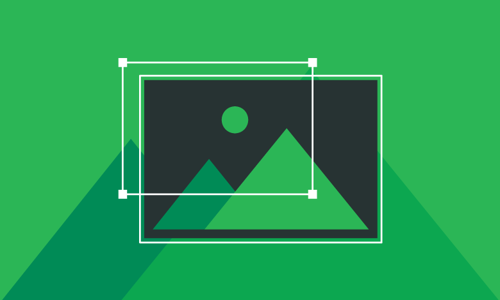

In [ ]:
#Reading image from url
image = Image.open(requests.get('https://media.sproutsocial.com/uploads/2017/02/10x-featured-social-media-image-size.png' , stream = True).raw)
image_logow = image.resize((500,300))
image_textw = image.resize((500,300))
image_logow

For this project we need an image url on which apply watermark. We will load the imahge using the url of the image from google images.
You can use any image that you desire and replace the url of the image with current url. Next we will read and resize the image and finally store it into two variables for logo and text watermarking.

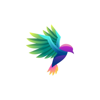

In [ ]:
# Reading logo from url
logo = Image.open(requests.get('https://img.freepik.com/free-vector/colorful-bird-illustration-gradient_343694-1741.jpg?size=626&ext=jpg&ga=GA1.1.2079245679.1714582225&semt=ais_user' , stream  = True).raw)
logo_logow = logo.resize((100,100))
logo_logow

For Logo we are using logo which is downloaded using the above url

In [ ]:
image_logow = np.array(image_logow.convert('RGB'))
h_image , w_image , _= image_logow.shape
logo_logow = np.array(logo_logow.convert('RGB'))
h_logo , w_logo , _= logo_logow.shape

In order to use these images we will first convert them into RGB format and store it as a numpy array. Similarly , we will also extract the shape i.e. it's height and weight.

In [ ]:
# Get the center of the original . It's the location where we will place the watermark
center_y = int(h_image/2)
center_x = int(w_image/2)
top_y = center_y - int(h_logo/2)
left_x = center_x - int(w_logo/2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

We will place our watermark in the center of the image so for that we need to calculate the center of the image.
Here , we will find out the center coordinates of the center  coordinates of the image using height and width of the image.

In [ ]:
# Get ROI
roi = image_logow[top_y : bottom_y  , left_x : right_x]
# Add the logo to the Roi

result = cv2.addWeighted(roi , 1 , logo_logow , 1 , 0)

#Drawing
cv2.line(image_logow , ( 0, center_y) , (left_x , center_y) , (0,0,255), 1)
cv2.line(image_logow , (right_x , center_y ) , (w_image , center_y) ,( 0,0,255),1)


# Replace the ROI on the image
image_logow[top_y : bottom_y , left_x : right_x] = result


A Region of interset defined as the area we need to place our watermark on . Here , we will find out ROI using the coordinates we found above,
Next we will use OpenCv to merge our logo on ROI . Similarly we will also add a line or a pattern on our images.

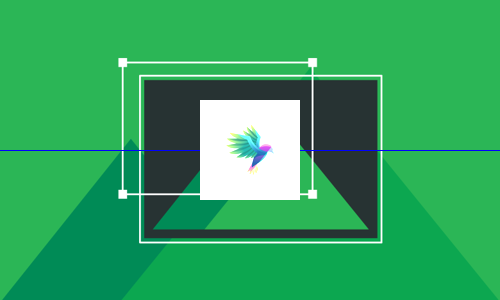

In [ ]:
# PLotting logo watermark image
img = Image.fromarray(image_logow , 'RGB')
img

Now , We will convert the image from array to RGB and visualize it.

In [ ]:
# Text Watermark
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text , text='Pianalytix' , org =(w_image - 95  , h_image = 10 ) , fontFace = cv2.FONT_HERSHEY_COMPLEX , fontScale = 0.5 , color =(0,0,255), thickness=2 , lineType = cv2.LINE_4);



SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<ipython-input-39-3aee528cb5f9>, line 3)

Now , we shall see how we can use a text as a Watermark . We will convert our image into RGB and save it as a numpy array. To put a text as a watermark we will be using putText() function of OpenCV . Here we can use different features like size of the text , thickness of the text , font family , etc.

In [ ]:
# PLotting text watermark image
timg = Image.fromarray(image_text , 'RGB')
timg

NameError: name 'image_text' is not defined

# Traffic Sign Classification

In this project , we will use Convolutional Neural Network to build train and test a traffic sign classification model.

We will build this model using tensorflow and keras. It is a multiclass classification problem.This model can be used to make smarter cars.

In [ ]:
# Run this cell and select the kaggle.json file downloaded from the kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"nik1303","key":"1e0ec9d5bdf889b7ef7e6d482dd626c6"}'}

We will start by connecting to kaggle API which can be downloaded from your kaggle account's settings and uploading it here(upload box).

In [ ]:
# Next , install the kaggle API client
!pip install -q kaggle

Installing Kaggle api using pip

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle , so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


# This permissions change avoids a warning on Kaggle tool startup
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# Creating directory and changing the current working directory
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [ ]:
# Searching for datasets
!kaggle dtasets list -s gtsrb-german-traffic-sign

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
# Importing  libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense,Flatten,MaxPool2D


Importing Important Libraries.

NotADirectoryError: [Errno 20] Not a directory: '/content/traffic.csv'

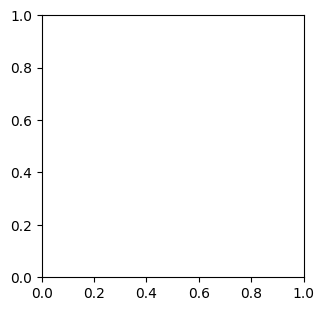

In [ ]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/traffic.csv"

for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1] , fontsize = 10) # width of image
  plt.ylabel(rand_img.shape[0] , fontsize = 10) # height of the image



**Download And Imports**

In [ ]:
# Fundamental classes
import numpy as np
import pandas as pd
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

#Performance Plot
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Time
import time
import datetime

**Functions**

In [ ]:
# date_time function

def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:
        return 'Date today: %s' % datetime.date.today()

In [ ]:
# Performance Plot

def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()


**Loading Dataset**

In [ ]:
# Setting variables for later use
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels
for i in range(classes):
    path = os.path.join('/content/traffic.csv','train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

NotADirectoryError: [Errno 20] Not a directory: '/content/traffic.csv/train/0'

**Data Splitting And Conversion**

In [ ]:
# Checking data shape
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

AttributeError: 'list' object has no attribute 'shape'

**Creating And Compiling the Model**

In [ ]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.20))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary()

**Training the Mode**l

In [ ]:
# Training the Model
with tf.device('/GPU:0'):
    epochs = 100
    history1 = model.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_test, y_test))

**Visualizing the performance of the model during Training Phase**

In [ ]:
plot_performance(history=history1)

**Loading Test Dataset And Evaluationof the Model **

In [ ]:
# testing accuracy on test dataset
from sklearn.metrics import accuracy_score

# Importing the test dataset
y_test = pd.read_csv('../input/gtsrb-german-traffic-sign/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

# Retreiving the images
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('../input/gtsrb-german-traffic-sign/'+img)
        image = image.resize([30, 30])
        data.append(np.array(image))

X_test=np.array(data)

In [ ]:
with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

**Saving the Model**

In [ ]:
# Saving the Model
model.save('traffic_classifier.h5')

# **Optical_Character_Recognition_using_Image**

In this project , we will be working on extracting text from images. After extracting the text we will apply some basic functions of OpenCV on that text to enhance it and to get more accurate results. This project will be very useful as it will save time and effort of typing from an image.

In [ ]:
# import requests to install tesseract
import requests

In [ ]:
# Downloading tesseract-ocr file
r = requests.get("https://tesseract-ocr.github.io/tessdoc/", stream = True)


In this step we will instaall the required libraries for ocr and we will also import IPython functions to clear the undesired.

In [ ]:
# Installing Libraries required for optical character recognition
! apt install tesseract-ocr libtesseract-dev libmagickwand-dev

# Importing IPython to clear output which is not important
from IPython.display import HTML , clear_output
clear_output()

Now we will install pytesseract and opencv libraries.

In [ ]:
# Installing pytesseract and opencv
! pip install pytesseract wand opencv-python
clear_output()

Importing Important Libraries

In [ ]:
# Import Libraries
from PIL import Image # PIL - Python Imaging Libraries
import pytesseract
import cv2
import numpy as np
from pytesseract import Output
import re

In the Next Step , we will open an image resize it and then again save it for further use and visualize it


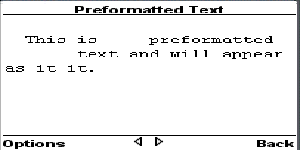

In [ ]:
#   Reading the image from url
image  =  Image.open(requests.get('https://www.tutorialspoint.com/wml/images/wap-example7.gif',stream = True). raw)
image = image.resize((300,150))
image.save('/content/project.gif')
image

Here we will be extracting the text from image with custom configuration

In [ ]:
# Simply extracting text from image
custom_config = r'-l eng --oem 3 --psm 6'
text = pytesseract.image_to_string(image,config=custom_config)
print(text)

Preformatted Text
This io preformattca
heen and will annear
as it ait.
Options ab Back



Now we will remove unwanted symbols from the text we extracted by replacing the symbol with an empty string.

In [ ]:
# Extracting text from image and removing irrelevent symbols from characters
try:
  text = pytesseract.image_to_string(image,lang = 'eng')
  characters_to_remove = "!()@-*>+-/,'|#%$&^_~"
  new_string = text
  for character in characters_to_remove:
    new_string = new_string.replace(character,"")
  print(new_string)

except IOError as e:
  print("Error (%s). " %e)

   

Preformatted Text
This io preformattca
heen and will annear

as it ait.

 

Options ab Back



In the next step we are reading the image into opencv format to process it further. This is required when we need to extract the text from complex images.

In [ ]:
# Now , we will perfom opencv operations to get text from complex images
image = cv2.imread('project.gif')

Converting the images to grayscale so that it becomes less complex to process as it will have only two values 0 anf 1.

cv2.cvtColor() method is used to convert an image from one color space to another. There are more than 150 color-space conversion methods available in OpenCV.

In [ ]:
# get grayscale image
def get_grayscale(image):
  return cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
gray = get_grayscale(image)


# Convert the grayscale image to a PIL Image and display it
pil_image = Image.fromarray(gray)
pil_image.show()


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


Now , we will blur the image so that we can remove the noise from the image. Here , the function cv2.medianBlur() computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value. This is highly effective in removing noise.

In [ ]:
# noise removal
def remove_noise(image):
  return cv2.medianBlur(image , 5)
noise = remove_noise(gray)
Image.fromarray(gray)



NameError: name 'gray' is not defined

We will perform threshold transformation here .cv2 , If Pixel value is greater than a threshold value , it is assigned one value (may be white) , else it is assigned another (may be black) . The function used is cv2.threhold.First argument is the source image, which should be a grayscale image.

In [ ]:
# Thresholding
def thresholding(image):
  return cv2.threshold(image , 0 , 255 , cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thresh = thresholding(image)
Image.fromarray(thresh)

AttributeError: 'NoneType' object has no attribute '__array_interface__'

In [ ]:
# Erosion
def erode(image):
  kernel = np.ones((5,5),np.uint8)
  return cv2.erode(image , kernel , iterations = 1)
erode = erode(gray)
Image.fromarray(erode)

In [ ]:
# Morphology
def opening(image):
  kernel = np.ones((5,5) , np.uint8)
  return cv2.morpholoyEx(image , cv2.MORPH_OPEN , kernel)
opening = opening(gray)
Image.fromarray(opening)

In [ ]:
# canny edge detection
def canny(image):
  return cv2.Canny(image , 100 , 200)
canny = canny(gray)
Image.fromarray(canny)

In [ ]:
# Template matching
def match_template(image , template):
  return cv2.matchTemplate(image  , template , cv2.TM_CCOEFF_NORMED)
match = match_template(gray , gray)
match

In [ ]:
# Drawing rectangele around text
img = cv2.imread('/content/project.gif')
h , w , c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
  b  = b.split(' ')
  img = cv2.rectangle(img , (int(b[1]) , h - int(b[2])) , (int(b[3]) , h - int(b[4])) , (0,255,0) , 2 )
Image.fromarray(img)

AttributeError: 'NoneType' object has no attribute 'shape'